# Epidemic model: Susceptible-Infected-Susceptible (SIS)

- A susceptible node can get infected from an infected neighbor node with infection probability $p_i$
- while an infected node can recover back to a susceptible node (i.e., no immunity acquired) with recovery probability $p_r$

In [1]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

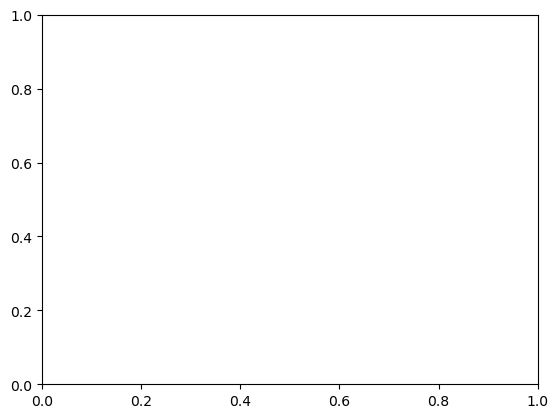

In [2]:
p_i = 0.5 # infection probability
p_r = 0.5 # recovery probability

# initialize a graph
g = nx.karate_club_graph()
pos = nx.circular_layout(g)

np.random.seed(20)
init_state = np.where(np.random.randn(len(g.nodes)) < 0.5, 1, 0)

for i in g.nodes():
    g.nodes[i]['state'] = init_state[i]

# Initial drawing
plt.cla()
fig, ax = plt.subplots(figsize=(6,6))
plt.close()

# simulate
def animate(frame):
    global g
    ax.clear()
    
    a = random.choice(list(g.nodes()))
    if g.nodes[a]['state'] == 0: # if susceptible
        b = random.choice(list(g.neighbors(a)))
        if g.nodes[b]['state'] == 1: # if neighbor b is infected
            g.nodes[a]['state'] = 1 if random.random() < p_i else 0
            
    else: # if infected
        g.nodes[a]['state'] = 0 if random.random() < p_r else 1
        
    plt.cla()
    nx.draw(g, cmap=plt.cm.coolwarm, vmin=0, vmax=1,
            node_color=[g.nodes[n]['state'] for n in g.nodes()],
            pos=pos,
            ax=ax)
    plt.close()

In [3]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')

In [4]:
anim = animation.FuncAnimation(fig, animate, frames=30, interval=100)

In [5]:
anim

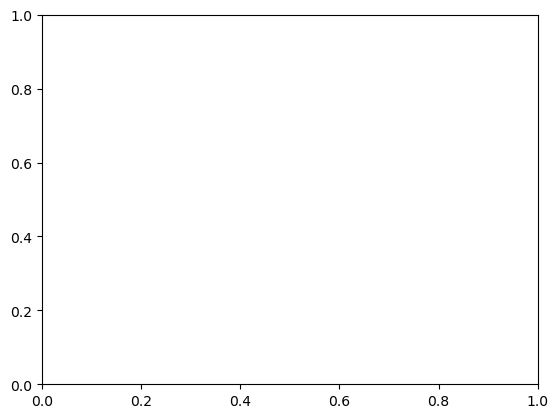

In [6]:
p_i = 0.5 # infection probability
p_r = 0.5 # recovery probability

# initialize a graph
g = nx.gnm_random_graph(500, 1000, seed=42)
pos = nx.circular_layout(g)

np.random.seed(20)
init_state = np.where(np.random.randn(len(g.nodes)) < 0.5, 1, 0)

for i in g.nodes():
    g.nodes[i]['state'] = init_state[i]

# Initial drawing
plt.cla()
fig, ax = plt.subplots(figsize=(6,6))
plt.close()

# simulate
def animate(frame):
    global g
    ax.clear()
    
    a = random.choice(list(g.nodes()))
    if g.nodes[a]['state'] == 0 and len(list(g.neighbors(a))) > 0: # if susceptible
        b = random.choice(list(g.neighbors(a)))
        if g.nodes[b]['state'] == 1: # if neighbor b is infected
            g.nodes[a]['state'] = 1 if random.random() < p_i else 0
            
    else: # if infected
        g.nodes[a]['state'] = 0 if random.random() < p_r else 1
        
    plt.cla()
    nx.draw(g, cmap=plt.cm.binary, vmin=0, vmax=1,
            node_color=[g.nodes[n]['state'] for n in g.nodes()],
            pos=pos, node_size=10, ax=ax, alpha=0.5, width=0.1)
    plt.close()

In [7]:
anim = animation.FuncAnimation(fig, animate, frames=100, interval=100)

In [8]:
anim